# **Prediction of Heart Disease Using Machine Learning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [2]:
data=pd.read_csv('heart_disease.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

# **Filling Missing Values**

In [4]:
numerical_cols=['Age','Blood Pressure','Cholesterol Level','BMI','Sleep Hours','Triglyceride Level','Fasting Blood Sugar','CRP Level','Homocysteine Level']

In [5]:
categorical_cols=data.drop(numerical_cols,axis=1)

In [6]:
for col in numerical_cols:
  data[col].fillna(data[col].mean(),inplace=True)

<ipython-input-6-7ba73270ff9e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(),inplace=True)


In [7]:
for col in categorical_cols:
  data[col].fillna(data[col].mode()[0],inplace=True)

<ipython-input-7-3c95fdcac671>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0],inplace=True)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   


*   All missing values are filled
*   Assuming all numerical coloumn have no significant outliers







#**Conversion of categorical coloumns with the help of One-hot encoding**

In [9]:
categorical_cols.head()

,Gender,Exercise Habits,Smoking,Family Heart Disease,Diabetes,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sugar Consumption,Heart Disease Status
0,Male,High,Yes,Yes,No,Yes,Yes,No,High,Medium,Medium,No
1,Female,High,No,Yes,Yes,No,Yes,No,Medium,High,Medium,No
2,Male,Low,No,No,No,No,Yes,Yes,Low,Low,Low,No
3,Female,High,Yes,Yes,No,Yes,No,Yes,Low,High,High,No
4,Male,Low,Yes,Yes,Yes,Yes,No,No,Low,High,High,No


In [10]:
data_new=pd.get_dummies(data,columns=(categorical_cols.drop('Heart Disease Status',axis=1)).columns)
data_new.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status,...,High LDL Cholesterol_Yes,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_High,Stress Level_Low,Stress Level_Medium,Sugar Consumption_High,Sugar Consumption_Low,Sugar Consumption_Medium
0,56.0,153.0,155.0,24.991591,7.633228,342.0,120.142213,12.969246,12.387250,No,...,False,True,False,False,False,False,True,False,False,True
1,69.0,146.0,286.0,25.221799,8.744034,133.0,157.000000,9.355389,19.298875,No,...,False,False,False,True,True,False,False,False,False,True
2,46.0,126.0,216.0,29.855447,4.440440,393.0,92.000000,12.709873,11.230926,No,...,True,False,True,False,False,True,False,False,True,False
3,32.0,122.0,293.0,24.130477,5.249405,293.0,94.000000,12.509046,5.961958,No,...,True,False,True,False,True,False,False,True,False,False
4,60.0,166.0,242.0,20.486289,7.030971,263.0,154.000000,10.381259,8.153887,No,...,False,False,True,False,True,False,False,True,False,False


In [11]:
Heart_disease_status_map={'No':0,'Yes':1}
data_new['Heart Disease Status']=data_new['Heart Disease Status'].map(Heart_disease_status_map)

# **Scaling of numerical coloumns for better performance of model**

In [12]:
mm_scalar=MinMaxScaler()
data_new[numerical_cols]=mm_scalar.fit_transform(data[numerical_cols])

In [13]:
data_new.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status,...,High LDL Cholesterol_Yes,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_High,Stress Level_Low,Stress Level_Medium,Sugar Consumption_High,Sugar Consumption_Low,Sugar Consumption_Medium
0,0.612903,0.550000,0.033333,0.317756,0.605503,0.806667,0.501778,0.864751,0.492507,0,...,False,True,False,False,False,False,True,False,False,True
1,0.822581,0.433333,0.906667,0.328222,0.790657,0.110000,0.962500,0.623722,0.953319,0,...,False,False,False,True,True,False,False,False,False,True
2,0.451613,0.100000,0.440000,0.538899,0.073314,0.976667,0.150000,0.847452,0.415412,0,...,True,False,True,False,False,True,False,False,True,False
3,0.225806,0.033333,0.953333,0.278604,0.208156,0.643333,0.175000,0.834058,0.064120,0,...,True,False,True,False,True,False,False,True,False,False
4,0.677419,0.766667,0.613333,0.112914,0.505116,0.543333,0.925000,0.692144,0.210260,0,...,False,False,True,False,True,False,False,True,False,False


# **Class Imbalance Check for Heart Disease Status Column**

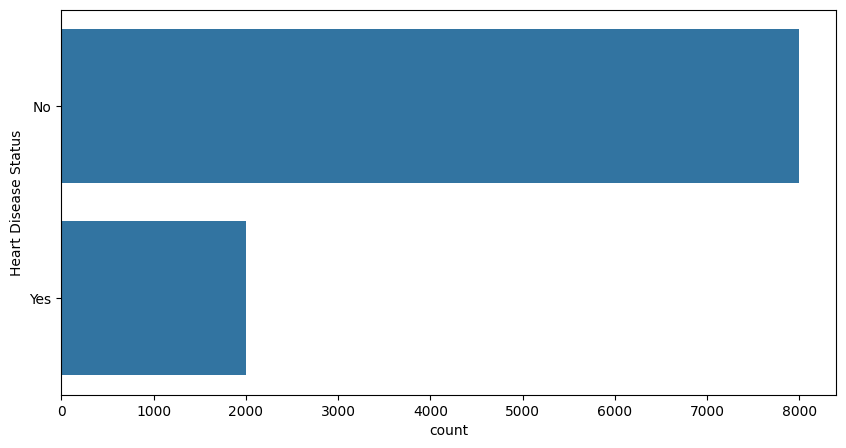

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data['Heart Disease Status'])
plt.show()

Above results shows class imbalance

# **Applying SMOTE Technique to resolve Class Imbalance**

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
data_new2=data_new.copy()
X = data_new2.drop('Heart Disease Status',axis=1)
Y = data_new2['Heart Disease Status']
smote = SMOTE()
X_smote,Y_smote = smote.fit_resample(X,Y)
Y_smote.value_counts()


,count
Heart Disease Status,
0,8000
1,8000


# **Validation of Dataset (80% for train and 20% for test)**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=2)

# **Model (Logistic Regression) Implementation and Evaluation**

In [18]:
model_logistic=LogisticRegression()

In [19]:
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [20]:
Y_pred_logistic=model_logistic.predict(X_test)
logistic_accuracy=accuracy_score(Y_test,Y_pred_logistic)

In [21]:
logistic_accuracy

0.85875

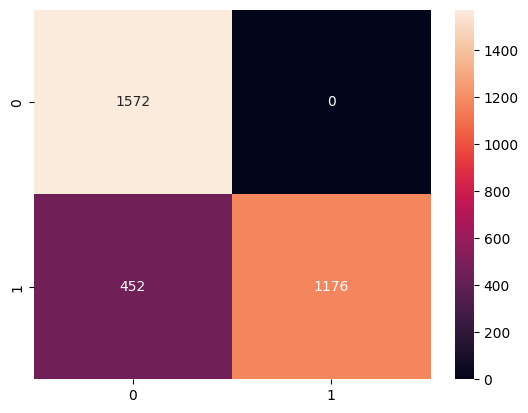

In [22]:
sns.heatmap(confusion_matrix(Y_test,Y_pred_logistic),annot=True,fmt='d')
plt.show()

In [23]:
logistic_auc=roc_auc_score(Y_test,Y_pred_logistic)

In [25]:
logistic_auc

0.8611793611793612

ROC AUC Score: 0.8611793611793612


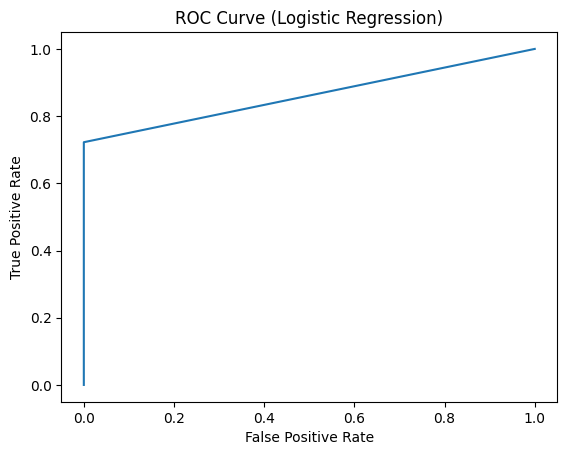

In [28]:
print(f"ROC AUC Score: {logistic_auc}")
from sklearn.metrics import roc_curve
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(Y_test, Y_pred_logistic)
plt.plot(fpr_logistic, tpr_logistic)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.show()

# **Model (Decision Tree) Implementation and Evaluation**

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model_dt=DecisionTreeClassifier(max_depth=4)
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [31]:
Y_pred_dt=model_dt.predict(X_test)
dt_accuracy=accuracy_score(Y_test,Y_pred_dt)

In [32]:
dt_accuracy

0.5878125

In [33]:
auc_dt=roc_auc_score(Y_test,Y_pred_dt)

In [34]:
auc_dt

0.5841249820257454

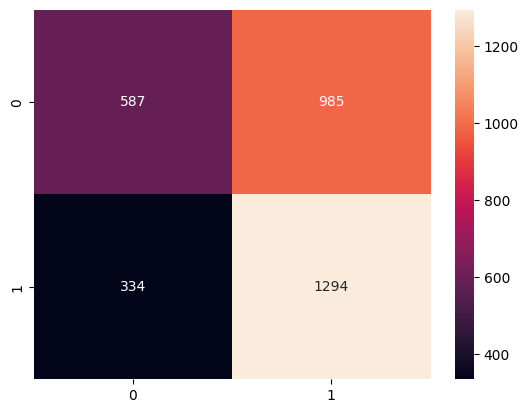

In [35]:
sns.heatmap(confusion_matrix(Y_test,Y_pred_dt),annot=True,fmt='d')
plt.show()

ROC AUC Score: 0.5841249820257454


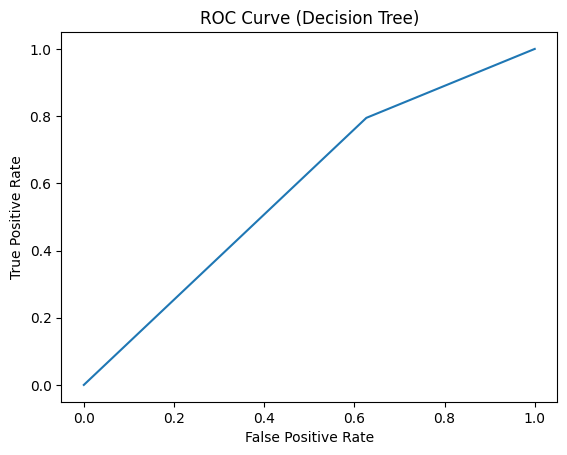

In [36]:
print(f"ROC AUC Score: {auc_dt}")
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, Y_pred_dt)
plt.plot(fpr_dt, tpr_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.show()

# **Model (Naive-Bayes) implementation and Evaluation**

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
model_nb=GaussianNB()
model_nb.fit(X_train,Y_train)

GaussianNB()

In [39]:
Y_pred_nb=model_nb.predict(X_test)

In [40]:
nb_accuracy=accuracy_score(Y_test,Y_pred_nb)

In [41]:
nb_accuracy

0.7159375

In [42]:
auc_nb=roc_auc_score(Y_test,Y_pred_nb)

In [43]:
auc_nb

0.7160310032447438

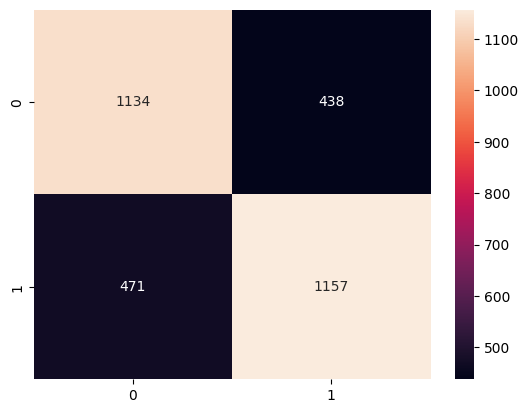

In [44]:
sns.heatmap(confusion_matrix(Y_test,Y_pred_nb),annot=True,fmt='d')
plt.show()

ROC AUC Score: 0.7160310032447438


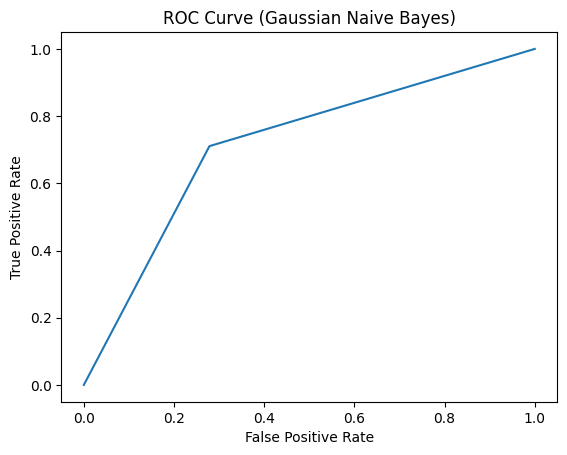

In [45]:
print(f"ROC AUC Score: {auc_nb}")
fpr_nb, tpr_nb, thresholds_nb = roc_curve(Y_test, Y_pred_nb)
plt.plot(fpr_nb, tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gaussian Naive Bayes)')
plt.show()

# **Model (Random Forest) implementation and Evaluation**

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,Y_train)

RandomForestClassifier()

In [48]:
Y_pred_rf=model_rf.predict(X_test)

In [49]:
rf_accuracy=accuracy_score(Y_test,Y_pred_rf)

In [50]:
rf_accuracy

0.880625

In [51]:
auc_rf=roc_auc_score(Y_test,Y_pred_rf)

In [52]:
auc_rf

0.8810588867840776

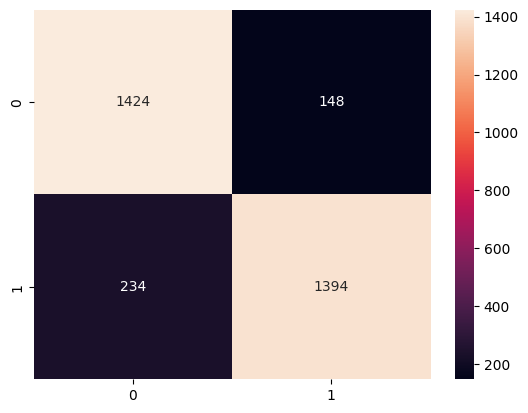

In [53]:
sns.heatmap(confusion_matrix(Y_test,Y_pred_rf),annot=True,fmt='d')
plt.show()

ROC AUC Score: 0.8810588867840776


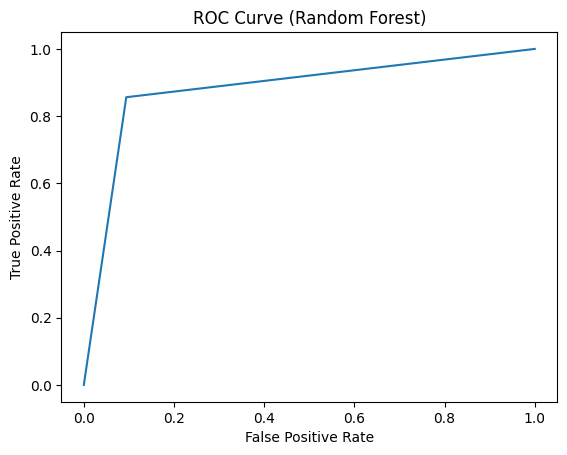

In [55]:
print(f"ROC AUC Score: {auc_rf}")
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_pred_rf)
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.show()

# **Remove features (importance<0.05) for Increasing Perfomance of the Model**

In [59]:
imp_features = {'Feature': X_train.columns, 'Importance': model_rf.feature_importances_}
imp_features_df = pd.DataFrame(imp_features)
imp_features_df = imp_features_df.sort_values(by='Importance', ascending=False)
imp_features_df

,Feature,Importance
7,CRP Level,0.078181
0,Age,0.077278
1,Blood Pressure,0.076996
6,Fasting Blood Sugar,0.076305
3,BMI,0.076186
2,Cholesterol Level,0.075893
8,Homocysteine Level,0.074157
5,Triglyceride Level,0.071811
4,Sleep Hours,0.071193
30,Stress Level_Low,0.014746


In [70]:
X_new=(imp_features_df[imp_features_df['Importance']>0.05].Feature).reset_index(drop=True)

In [75]:
model_rf_new=RandomForestClassifier(n_estimators=100)
model_rf_new.fit(X_train[X_new],Y_train)

RandomForestClassifier()

In [76]:
Y_pred_rf_new=model_rf_new.predict(X_test[X_new])

In [77]:
rf_new_accuracy=accuracy_score(Y_test,Y_pred_rf_new)

In [78]:
rf_new_accuracy

0.775625

In [79]:
auc_rf_new=roc_auc_score(Y_test,Y_pred_rf_new)

In [81]:
auc_rf_new

0.7759391938781252

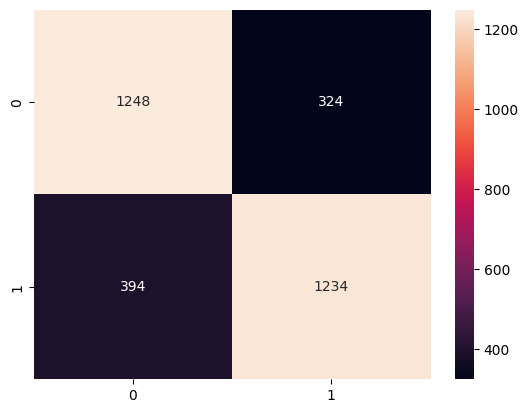

In [82]:
sns.heatmap(confusion_matrix(Y_test,Y_pred_rf_new),annot=True,fmt='d')
plt.show()

ROC AUC Score: 0.7759391938781252


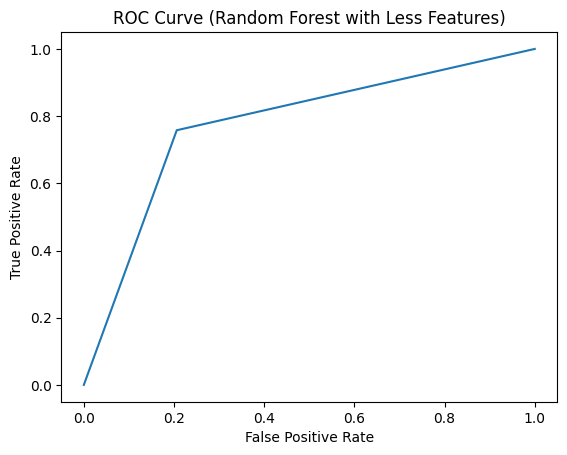

In [85]:
print(f"ROC AUC Score: {auc_rf_new}")
fpr_rf_new, tpr_rf_new, thresholds_rf_new= roc_curve(Y_test, Y_pred_rf_new)
plt.plot(fpr_rf_new, tpr_rf_new)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest with Less Features)')
plt.show()

# **Comaprisons of Models**

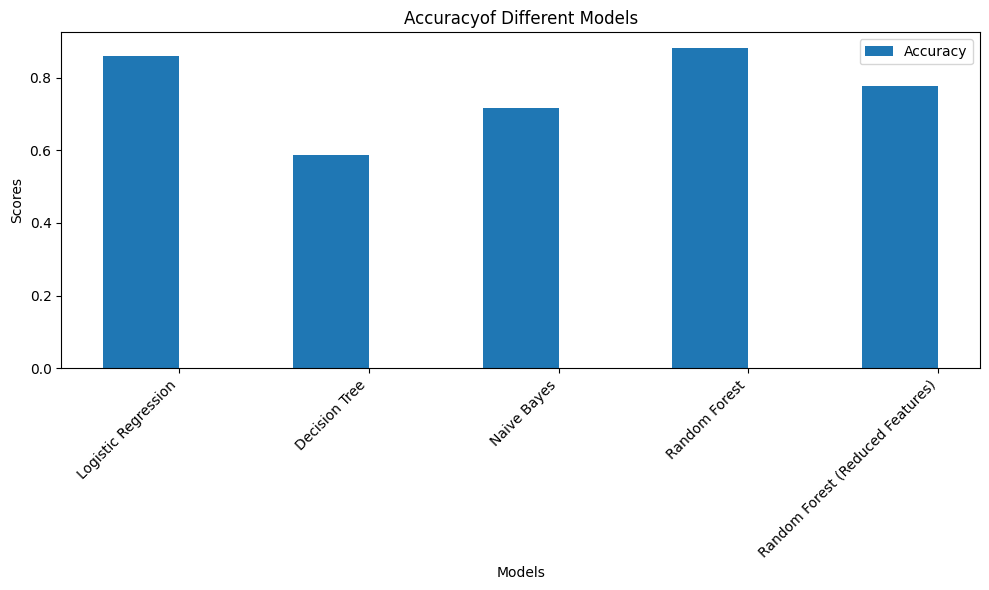

In [88]:
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'Random Forest (Reduced Features)']
accuracies = [logistic_accuracy, dt_accuracy, nb_accuracy, rf_accuracy, rf_new_accuracy]
plt.figure(figsize=(10, 6))
X_axis = np.arange(len(models))
plt.bar(X_axis - 0.2, accuracies, 0.4, label='Accuracy')
plt.xticks(X_axis, models, rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy of Different Models')
plt.legend()
plt.tight_layout()
plt.show()

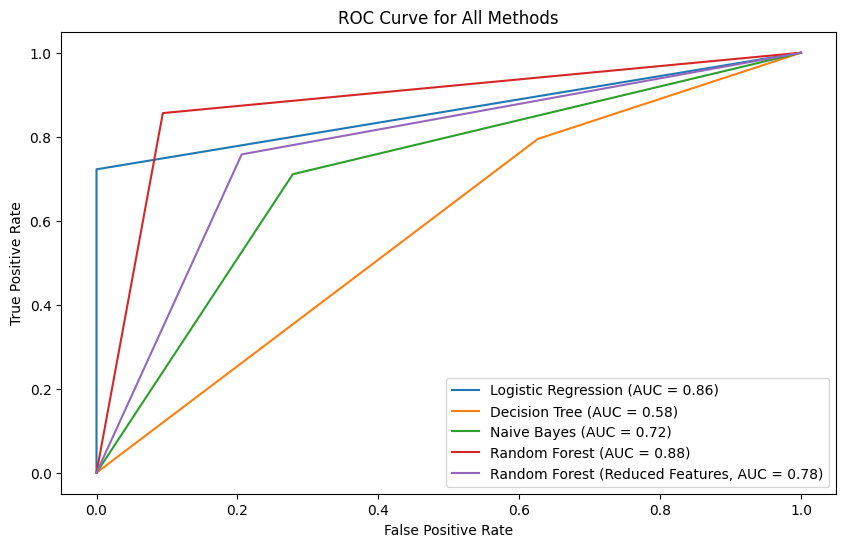

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %0.2f)' % logistic_auc)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % auc_nb)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_rf_new, tpr_rf_new, label='Random Forest (Reduced Features, AUC = %0.2f)' % auc_rf_new)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Methods')
plt.legend(loc='lower right')
plt.show()

**Conclusion**

The ROC (Receiver Operating Characteristic) curve shown in the image compares the performance of five different classification models:

Logistic Regression, Decision Tree, Naive Bayes, Random Forest, and Random Forest with reduced features. The key takeaway can be summarized as:

Best Performing Model: The Random Forest model has the highest AUC (Area Under the Curve) of 0.88, indicating the best overall performance among the models tested.

Logistic Regression: Logistic Regression also performed well with an AUC of 0.86, close to Random Forest, indicating strong discriminative ability.

Naive Bayes: The Naive Bayes classifier had a moderate performance with an AUC of 0.72, showing reasonable but lower classification power compared to the top models.

Decision Tree: The Decision Tree performed the poorest among the models with an AUC of 0.58, indicating weak classification capability and performance close to random guessing.

Feature Reduction Impact: The Random Forest with reduced features (AUC = 0.78) performed worse than the full-featured Random Forest but still better than some other models, suggesting some impact of feature reduction.

Conclusion:

Random Forest and Logistic Regression are the top-performing models for this dataset. Decision Tree showed the weakest performance, while Naive Bayes had moderate results. Reducing features slightly lowered the performance of the Random Forest model. The choice of model should balance performance with interpretability and complexity depending on the use case.





